# walmart

In [762]:
import sys
sys.path.append('..')

In [763]:
# imoports
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch

In [764]:
# constants

FEATURES_DATA_FILE = '../data/features.csv'
STORES_DATA_FILE = '../data/stores.csv'
TRAIN_DATA_FILE = '../data/train.csv'
TEST_DATA_FILE = '../data/test.csv'

## Load the data

In [765]:
features_df = pd.read_csv(FEATURES_DATA_FILE)
store_df = pd.read_csv(STORES_DATA_FILE)
train_original_df = pd.read_csv(TRAIN_DATA_FILE)

In [766]:
features_df["Date"] = features_df["Date"].apply(pd.to_datetime)
train_original_df["Date"] = train_original_df["Date"].apply(pd.to_datetime)

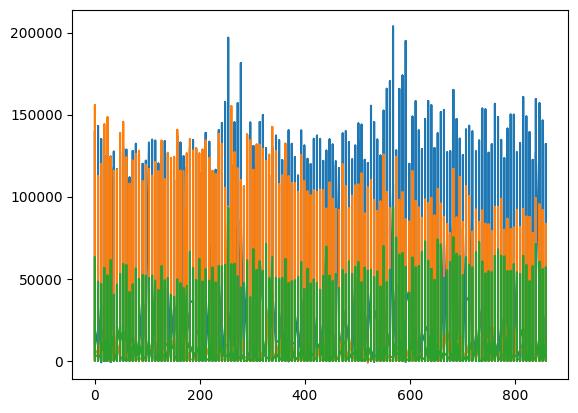

In [767]:
view_df = train_original_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df["DN"] = (view_df["DN"] / 100000000000000).astype(int)
view_df["DN"] = view_df["DN"] - view_df["DN"].min()

view_df = view_df.sort_values(by=["DN"])

for store in view_df["Store"].sort_values().unique():
    if int(store) in [1, 3, 5]:
        x = view_df[view_df["Store"] == store]["DN"]
        y = view_df[view_df["Store"] == store]["Weekly_Sales"]
        plt.plot(x, y)



In [768]:
df = train_original_df.copy()

In [769]:
SINGLE_STORE = False

if SINGLE_STORE:
    df = df[(df["Store"] == 1) & (df["Dept"] == 1)]

# Combine the tables

In [770]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [771]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [772]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [773]:
df = df.merge(store_df, on="Store")
df = df.merge(features_df, on=["Store", "Date"])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [774]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column, df[column].isna().sum())
        df = df.drop(columns=[column])

df

MarkDown1 270889
MarkDown2 310322
MarkDown3 284479
MarkDown4 286603
MarkDown5 270138


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667,False


## First Describe of the data

In [775]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,False


In [776]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,136727.915739,60.090059,3.361027,171.201947,7.960289
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,93638.000000,46.680000,2.933000,132.022667,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,182.318780,7.866000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,202505.000000,74.280000,3.738000,212.416993,8.572000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,219622.000000,100.140000,4.468000,227.232807,14.313000
std,12.785297,30.492054,NaN,22711.183519,60980.583328,18.447931,0.458515,39.159276,1.863296


In [777]:
df["IsHoliday"] = df["IsHoliday_x"]
df = df.drop(columns=["IsHoliday_x", "IsHoliday_y"])

In [778]:
df["Store-Type"] = df["Type"]
df["Store-Size"] = df["Size"]

df = df.drop(columns=["Type", "Size"])

In [779]:
df["Store-Type"] = df["Store-Type"].map({'A': 1, 'B': 2, 'C': 3})

In [780]:
df

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,1,151315
1,1,1,2010-02-12,46039.49,38.51,2.548,211.242170,8.106,True,1,151315
2,1,1,2010-02-19,41595.55,39.93,2.514,211.289143,8.106,False,1,151315
3,1,1,2010-02-26,19403.54,46.63,2.561,211.319643,8.106,False,1,151315
4,1,1,2010-03-05,21827.90,46.50,2.625,211.350143,8.106,False,1,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,64.88,3.997,192.013558,8.684,False,2,118221
421566,45,98,2012-10-05,628.10,64.89,3.985,192.170412,8.667,False,2,118221
421567,45,98,2012-10-12,1061.02,54.47,4.000,192.327265,8.667,False,2,118221
421568,45,98,2012-10-19,760.01,56.47,3.969,192.330854,8.667,False,2,118221


In [781]:
df["index-2"] = df.index
df["Store-Dept"] = df["Store"].astype(str) + "-" + df["Dept"].astype(str)
df = df.sort_values(by=["Store-Dept", "Date"])

In [782]:
for i in range(1, 5):
    df["Weekly-Sales-last-" + str(i) + "-weeks"] = df["Weekly_Sales"].shift(i)

for i in range(1, 4):
    df["Weekly-Diff-last-" + str(i) + "-weeks"] = df["Weekly-Sales-last-" + str(i) + "-weeks"] - df["Weekly-Sales-last-" + str(i+1) + "-weeks"]

df["Weekly-Diff"] = df["Weekly_Sales"] - df["Weekly_Sales"].shift(1)

df = df.drop(index=df.head(6).index)

In [783]:
for i in range(5):
    df = df.drop(index=df[df["Store-Dept"] != df["Store-Dept"].shift(1)].index)

In [784]:
df.index = df["index-2"]
df = df.drop(columns=["index-2"])

In [785]:
df["IsHoliday"] = df["IsHoliday"].map({True: 1, False: 0})

In [786]:
df = df.drop(columns=["Store-Dept"])

In [787]:
df = df.drop(columns=["Weekly_Sales"])

In [788]:
df

,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-1-weeks,Weekly-Sales-last-2-weeks,Weekly-Sales-last-3-weeks,Weekly-Sales-last-4-weeks,Weekly-Diff-last-1-weeks,Weekly-Diff-last-2-weeks,Weekly-Diff-last-3-weeks,Weekly-Diff
index-2,,,,,,,,,,,,,,,,,,
11,1,1,2010-04-23,64.84,2.795,210.439123,7.808,0,1,151315,17596.96,42960.91,57258.43,26229.21,-25363.95,-14297.52,31029.22,-1451.61
12,1,1,2010-04-30,67.41,2.780,210.389546,7.808,0,1,151315,16145.35,17596.96,42960.91,57258.43,-1451.61,-25363.95,-14297.52,409.76
13,1,1,2010-05-07,72.55,2.835,210.339968,7.808,0,1,151315,16555.11,16145.35,17596.96,42960.91,409.76,-1451.61,-25363.95,858.83
14,1,1,2010-05-14,74.78,2.854,210.337426,7.808,0,1,151315,17413.94,16555.11,16145.35,17596.96,858.83,409.76,-1451.61,1512.80
15,1,1,2010-05-21,76.44,2.826,210.617093,7.808,0,1,151315,18926.74,17413.94,16555.11,16145.35,1512.80,858.83,409.76,-4153.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87519,9,98,2011-12-16,47.31,3.159,222.882548,6.054,0,2,125833,75.77,54.75,60.75,42.00,21.02,-6.00,18.75,-9.02
87520,9,98,2011-12-23,44.43,3.112,223.066113,6.054,0,2,125833,66.75,75.77,54.75,60.75,-9.02,21.02,-6.00,-41.25
87521,9,98,2012-01-06,47.54,3.157,223.433241,5.667,0,2,125833,25.50,66.75,75.77,54.75,-41.25,-9.02,21.02,-25.00


# split to train and test

In [789]:
sorted_dates = df.sort_values(by="Date")["Date"]
sorted_dates = sorted_dates.reset_index()["Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()

df = df[df["Date"] <= limit_date].copy()

df = df.reset_index()

In [790]:
sorted_dates = df.sort_values(by="Date")["Date"]
sorted_dates = sorted_dates.reset_index()["Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()

train_df = df[df["Date"] <= limit_date].copy()
test_df = df[df["Date"] > limit_date].copy()

train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [791]:
df["Date"].sort_values().unique()

<DatetimeArray>
['2010-03-12 00:00:00', '2010-03-19 00:00:00', '2010-03-26 00:00:00',
 '2010-04-02 00:00:00', '2010-04-09 00:00:00', '2010-04-16 00:00:00',
 '2010-04-23 00:00:00', '2010-04-30 00:00:00', '2010-05-07 00:00:00',
 '2010-05-14 00:00:00',
 ...
 '2012-02-17 00:00:00', '2012-02-24 00:00:00', '2012-03-02 00:00:00',
 '2012-03-09 00:00:00', '2012-03-16 00:00:00', '2012-03-23 00:00:00',
 '2012-03-30 00:00:00', '2012-04-06 00:00:00', '2012-04-13 00:00:00',
 '2012-04-20 00:00:00']
Length: 111, dtype: datetime64[ns]

In [792]:
train_df["Date"].sort_values().unique()

<DatetimeArray>
['2010-03-12 00:00:00', '2010-03-19 00:00:00', '2010-03-26 00:00:00',
 '2010-04-02 00:00:00', '2010-04-09 00:00:00', '2010-04-16 00:00:00',
 '2010-04-23 00:00:00', '2010-04-30 00:00:00', '2010-05-07 00:00:00',
 '2010-05-14 00:00:00', '2010-05-21 00:00:00', '2010-05-28 00:00:00',
 '2010-06-04 00:00:00', '2010-06-11 00:00:00', '2010-06-18 00:00:00',
 '2010-06-25 00:00:00', '2010-07-02 00:00:00', '2010-07-09 00:00:00',
 '2010-07-16 00:00:00', '2010-07-23 00:00:00', '2010-07-30 00:00:00',
 '2010-08-06 00:00:00', '2010-08-13 00:00:00', '2010-08-20 00:00:00',
 '2010-08-27 00:00:00', '2010-09-03 00:00:00', '2010-09-10 00:00:00',
 '2010-09-17 00:00:00', '2010-09-24 00:00:00', '2010-10-01 00:00:00',
 '2010-10-08 00:00:00', '2010-10-15 00:00:00', '2010-10-22 00:00:00',
 '2010-10-29 00:00:00', '2010-11-05 00:00:00', '2010-11-12 00:00:00',
 '2010-11-19 00:00:00', '2010-11-26 00:00:00', '2010-12-03 00:00:00',
 '2010-12-10 00:00:00', '2010-12-17 00:00:00', '2010-12-24 00:00:00',
 '20

In [793]:
test_df["Date"].sort_values().unique()

<DatetimeArray>
['2011-12-02 00:00:00', '2011-12-09 00:00:00', '2011-12-16 00:00:00',
 '2011-12-23 00:00:00', '2011-12-30 00:00:00', '2012-01-06 00:00:00',
 '2012-01-13 00:00:00', '2012-01-20 00:00:00', '2012-01-27 00:00:00',
 '2012-02-03 00:00:00', '2012-02-10 00:00:00', '2012-02-17 00:00:00',
 '2012-02-24 00:00:00', '2012-03-02 00:00:00', '2012-03-09 00:00:00',
 '2012-03-16 00:00:00', '2012-03-23 00:00:00', '2012-03-30 00:00:00',
 '2012-04-06 00:00:00', '2012-04-13 00:00:00', '2012-04-20 00:00:00']
Length: 21, dtype: datetime64[ns]

In [794]:
mean_size = train_df["Store-Size"].mean()
std_size = train_df["Store-Size"].std()
train_df["Store-Size"] = (train_df["Store-Size"] - mean_size) / std_size
test_df["Store-Size"] = (test_df["Store-Size"] - mean_size) / std_size

In [795]:
train_df = train_df.drop(columns=["index-2"])
test_df = test_df.drop(columns=["index-2"])

In [796]:
train_df.head()

,index,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-1-weeks,Weekly-Sales-last-2-weeks,Weekly-Sales-last-3-weeks,Weekly-Sales-last-4-weeks,Weekly-Diff-last-1-weeks,Weekly-Diff-last-2-weeks,Weekly-Diff-last-3-weeks,Weekly-Diff
0,0,1,1,2010-04-23,64.84,2.795,210.439123,7.808,0,1,0.234554,17596.96,42960.91,57258.43,26229.21,-25363.95,-14297.52,31029.22,-1451.61
1,1,1,1,2010-04-30,67.41,2.780,210.389546,7.808,0,1,0.234554,16145.35,17596.96,42960.91,57258.43,-1451.61,-25363.95,-14297.52,409.76
2,2,1,1,2010-05-07,72.55,2.835,210.339968,7.808,0,1,0.234554,16555.11,16145.35,17596.96,42960.91,409.76,-1451.61,-25363.95,858.83
3,3,1,1,2010-05-14,74.78,2.854,210.337426,7.808,0,1,0.234554,17413.94,16555.11,16145.35,17596.96,858.83,409.76,-1451.61,1512.80
4,4,1,1,2010-05-21,76.44,2.826,210.617093,7.808,0,1,0.234554,18926.74,17413.94,16555.11,16145.35,1512.80,858.83,409.76,-4153.70


In [797]:
test_df.head()

,index,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-1-weeks,Weekly-Sales-last-2-weeks,Weekly-Sales-last-3-weeks,Weekly-Sales-last-4-weeks,Weekly-Diff-last-1-weeks,Weekly-Diff-last-2-weeks,Weekly-Diff-last-3-weeks,Weekly-Diff
0,84,1,1,2011-12-02,48.91,3.172,218.714733,7.866,0,1,0.234554,20911.25,19050.66,18689.54,39886.06,1860.59,361.12,-21196.52,4382.24
1,85,1,1,2011-12-09,43.93,3.158,218.961846,7.866,0,1,0.234554,25293.49,20911.25,19050.66,18689.54,4382.24,1860.59,361.12,8012.43
2,86,1,1,2011-12-16,51.63,3.159,219.179453,7.866,0,1,0.234554,33305.92,25293.49,20911.25,19050.66,8012.43,4382.24,1860.59,12467.11
3,87,1,1,2011-12-23,47.96,3.112,219.357722,7.866,0,1,0.234554,45773.03,33305.92,25293.49,20911.25,12467.11,8012.43,4382.24,1015.72
4,88,1,1,2011-12-30,44.55,3.129,219.535990,7.866,1,1,0.234554,46788.75,45773.03,33305.92,25293.49,1015.72,12467.11,8012.43,-23437.87


# Model 1

In [798]:
train_1_df = train_df.copy()
test_1_df = test_df.copy()

In [799]:
if SINGLE_STORE:
    for store in store_df["Store"].unique():
        train_1_df["Store-" + str(store)] = (train_1_df["Store"] == store).map({True: 1, False: 0})
        test_1_df["Store-" + str(store)] = (test_1_df["Store"] == store).map({True: 1, False: 0})

    for dept in train_1_df["Dept"].unique():
        train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
        test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})

In [800]:
train_1_df = train_1_df.drop(columns=["Store", "Dept"])
test_1_df = test_1_df.drop(columns=["Store", "Dept"])

In [801]:
if SINGLE_STORE:
    train_1_df = train_1_df.drop(columns=["Store-Size", "Store-Type"])
    test_1_df = test_1_df.drop(columns=["Store-Size", "Store-Type"])

In [802]:
train_1_df.columns

Index(['index', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Store-Type', 'Store-Size', 'Weekly-Sales-last-1-weeks',
       'Weekly-Sales-last-2-weeks', 'Weekly-Sales-last-3-weeks',
       'Weekly-Sales-last-4-weeks', 'Weekly-Diff-last-1-weeks',
       'Weekly-Diff-last-2-weeks', 'Weekly-Diff-last-3-weeks', 'Weekly-Diff'],
      dtype='object')

In [803]:
train_1_df.columns.size, test_1_df.columns.size

(17, 17)

In [804]:
x_train = train_1_df.drop(columns=["Weekly-Diff"])
y_train = train_1_df["Weekly-Diff"]

x_test = test_1_df.drop(columns=["Weekly-Diff"])
y_test = test_1_df["Weekly-Diff"]

In [805]:
x_train["Date"] = x_train["Date"].apply(lambda x: x.value)
x_test["Date"] = x_test["Date"].apply(lambda x: x.value)

In [806]:
for column in x_train.columns:
    x_train[column] = x_train[column].astype(float)
    x_test[column] = x_test[column].astype(float)


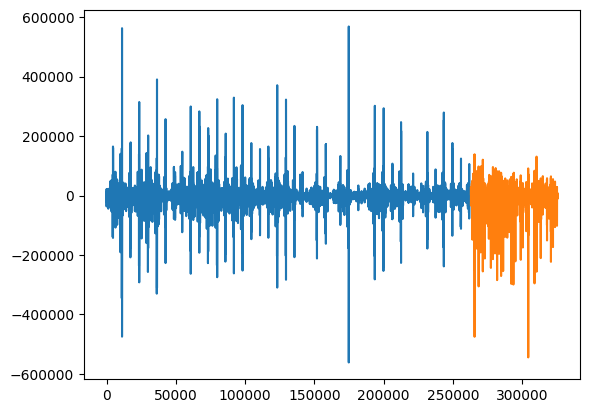

In [807]:
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test)

In [808]:
y_train.min(), y_test.min()

(-561345.54, -544310.8500000001)

In [809]:
y_test.describe()

count     62418.000000
mean       -344.370318
std        9479.883414
min     -544310.850000
25%        -751.745000
50%           5.935000
75%         844.667500
max      138617.910000
Name: Weekly-Diff, dtype: float64

In [810]:
mean_norm = y_train.mean()
std_norm = y_train.std()

y_train = (y_train - mean_norm) / std_norm
y_test = (y_test - mean_norm) / std_norm

In [811]:
y_test.describe()

count    62418.000000
mean        -0.055615
std          1.258004
min        -72.241294
25%         -0.109675
50%         -0.009129
75%          0.102173
max         18.385018
Name: Weekly-Diff, dtype: float64

In [812]:
for column in x_train.columns:
    if x_train[column].max() > 1:
        x_mean_size = x_train[column].mean()
        x_std_size = x_train[column].std()

        x_train[column] = (x_train[column] - x_mean_size) / x_std_size
        x_test[column] = (x_test[column] - x_mean_size) / x_std_size

In [813]:
y_test

0        0.571617
1        1.053353
2        1.644499
3        0.124872
4       -3.120179
           ...   
62413   -0.007127
62414   -0.011113
62415   -0.015390
62416   -0.013234
62417   -0.010116
Name: Weekly-Diff, Length: 62418, dtype: float64

In [814]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)

x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [815]:
x_train.shape[1]

16

In [816]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([263003, 16]),
 torch.Size([263003]),
 torch.Size([62418, 16]),
 torch.Size([62418]))

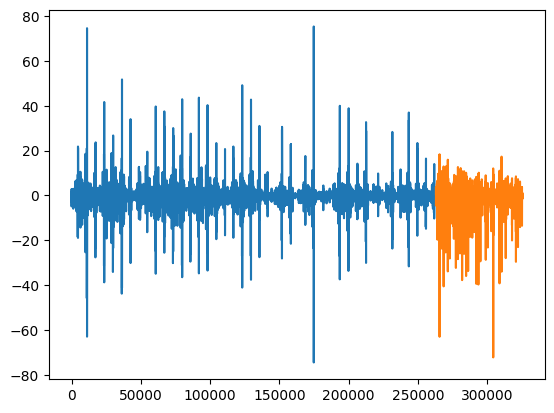

In [817]:
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_train) + 1, len(y_train) + 1 +len(y_test)), y_test)

In [818]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize: int):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, 1)

    def forward(self, x):
        out = self.linear(x)
        return out

def train_model_1(x_train, y_train, model, criterion, num_epochs, batch_size):
    num_epochs = 30
    lr = 0.01

    # Define an optimizer (Stochastic Gradient Descent)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    losses = []

    for epoch in range(num_epochs):
        running_loss = 0

        for batch in train_loader:
            inputs, targets = batch

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
                
        losses.append(running_loss / len(train_loader))

        if epoch % int(num_epochs / 10) == 0:
            print(f'Epoch [{epoch}], Running Loss: {running_loss:.4f}')

    return losses



model1 = linearRegression(x_train.shape[1])
criterion = torch.nn.MSELoss()

batch_size = 128

losses = train_model_1(x_train, y_train, model1, criterion, 10, batch_size)

/tmp/ipykernel_53930/624042244.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
/home/omer/anaconda3/envs/urinakysis-analysis/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/omer/anaconda3/envs/urinakysis-analysis/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([91])) that is different to the input size (torch.Size([91, 1])). This will likely lead to incorr

Epoch [0], Running Loss: 2065.5368
Epoch [3], Running Loss: 2054.9368
Epoch [6], Running Loss: 2054.8841
Epoch [9], Running Loss: 2054.9478
Epoch [12], Running Loss: 2054.9576
Epoch [15], Running Loss: 2054.9257
Epoch [18], Running Loss: 2054.9779
Epoch [21], Running Loss: 2055.2446
Epoch [24], Running Loss: 2055.0019
Epoch [27], Running Loss: 2054.9924


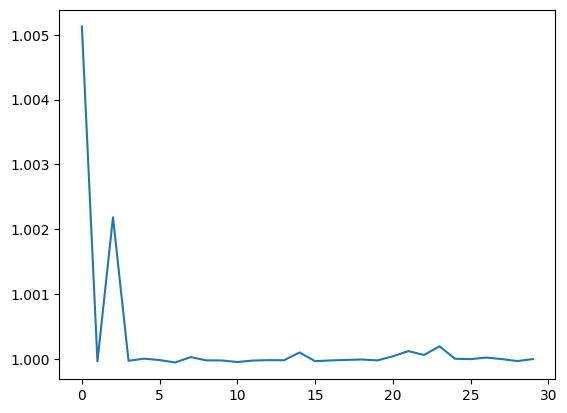

In [819]:
plt.plot(losses)

In [820]:
test_dataset = torch.utils.data.TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

running_loss = 0

results_target = []
results_output = []

for batch in test_loader:
    inputs, targets = batch

    outputs = model1(inputs)
    loss = criterion(outputs, targets)

    results_target += targets.detach().numpy().tolist()
    results_output += outputs.detach().numpy().tolist()

    running_loss += loss.item()
        
    print(f'Loss: {loss.item():.4f}')

target_loss = running_loss / len(test_loader)

print(f'Target: {target_loss:.4f} Running Loss: {running_loss:.4f}')

/tmp/ipykernel_53930/3019564286.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = torch.utils.data.TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))


Loss: 0.4659
Loss: 0.8169
Loss: 0.5174
Loss: 1.5887
Loss: 0.7994
Loss: 0.9366
Loss: 0.8503
Loss: 1.0460
Loss: 0.7415
Loss: 0.3448
Loss: 0.5843
Loss: 0.8042
Loss: 1.0186
Loss: 0.4017
Loss: 0.4012
Loss: 0.5293
Loss: 0.5107
Loss: 0.5998
Loss: 0.2476
Loss: 0.4544
Loss: 1.6566
Loss: 0.4147
Loss: 2.4787
Loss: 0.4153
Loss: 1.2941
Loss: 0.7644
Loss: 2.2635
Loss: 0.6344
Loss: 0.9321
Loss: 0.3931
Loss: 0.6841
Loss: 0.6897
Loss: 0.7124
Loss: 0.8537
Loss: 1.7743
Loss: 0.5671
Loss: 0.6209
Loss: 0.8962
Loss: 6.9199
Loss: 0.9836
Loss: 0.3761
Loss: 4.4521
Loss: 0.6807
Loss: 3.7448
Loss: 1.6631
Loss: 0.6205
Loss: 0.3139
Loss: 0.7254
Loss: 0.9267
Loss: 0.8741
Loss: 1.8371
Loss: 3.8786
Loss: 0.6771
Loss: 1.0525
Loss: 0.4780
Loss: 0.9408
Loss: 5.2634
Loss: 0.6677
Loss: 0.6726
Loss: 13.9252
Loss: 0.2820
Loss: 1.8143
Loss: 7.3863
Loss: 0.5703
Loss: 1.3069
Loss: 0.8100
Loss: 0.3833
Loss: 0.2066
Loss: 0.6708
Loss: 0.3811
Loss: 0.8432
Loss: 0.5046
Loss: 0.8019
Loss: 0.5517
Loss: 0.8058
Loss: 0.4738
Loss: 1.915

/home/omer/anaconda3/envs/urinakysis-analysis/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([82])) that is different to the input size (torch.Size([82, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [821]:
results_output

[[-0.007577180862426758],
 [-0.004443530924618244],
 [-0.003267236053943634],
 [-0.008222877979278564],
 [-0.010116100311279297],
 [-0.0029480941593647003],
 [-0.008854720741510391],
 [-0.007774785161018372],
 [-0.0073785074055194855],
 [-0.0070454031229019165],
 [-0.007904063910245895],
 [-0.0047002267092466354],
 [-0.004925943911075592],
 [-0.005136808380484581],
 [-0.0077967047691345215],
 [-0.006130039691925049],
 [0.004276573657989502],
 [-0.008122041821479797],
 [-0.009683873504400253],
 [-0.0062600672245025635],
 [-0.005921907722949982],
 [-0.007384192198514938],
 [-0.006122514605522156],
 [-0.00887596607208252],
 [-0.009249657392501831],
 [-0.006044149398803711],
 [-0.007421344518661499],
 [-0.007948450744152069],
 [-0.0067140087485313416],
 [-0.008297562599182129],
 [-0.010330267250537872],
 [-0.005754910409450531],
 [-0.009250134229660034],
 [-0.00902051292359829],
 [-0.008914336562156677],
 [-0.005817502737045288],
 [-0.007087007164955139],
 [-0.007923443801701069],
 [-0.007

In [822]:
results_output_view = [((x[0] * std_norm) + mean_norm) for x in results_output]

In [823]:
results_target_view = [((x * std_norm) + mean_norm) for x in results_target]

In [824]:
len(results_output_view), len(results_target_view)

(62418, 62418)

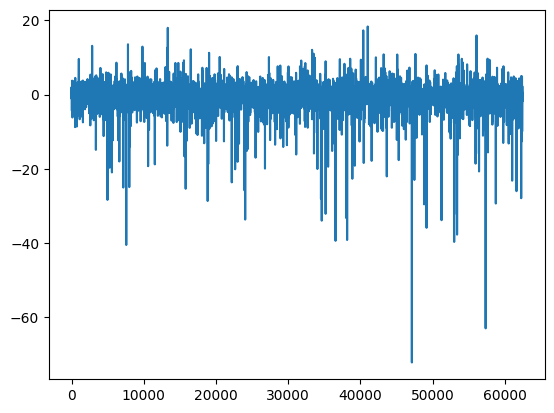

In [825]:
plt.plot(range(len(results_target)), results_target)

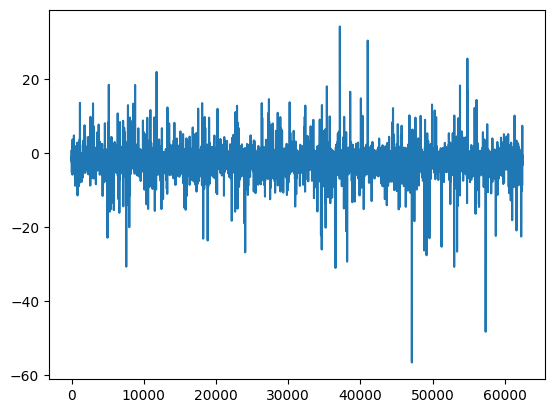

In [826]:
plt.plot(range(len(results_output)), [x[0] * 200 for x in results_output])

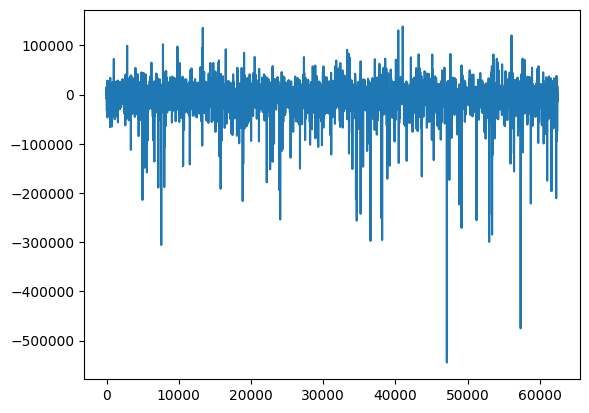

In [827]:
plt.plot(range(len(results_target_view)), results_target_view)

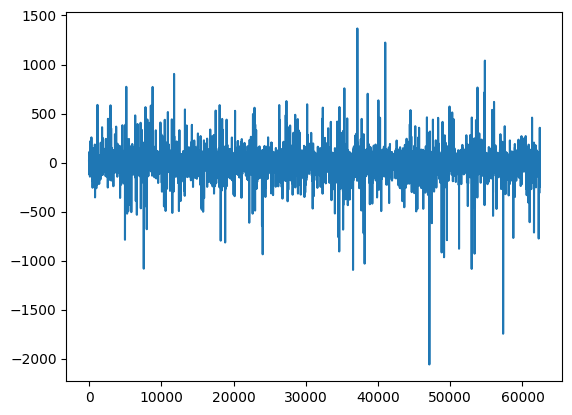

In [828]:
plt.plot(range(len(results_output_view)), results_output_view)

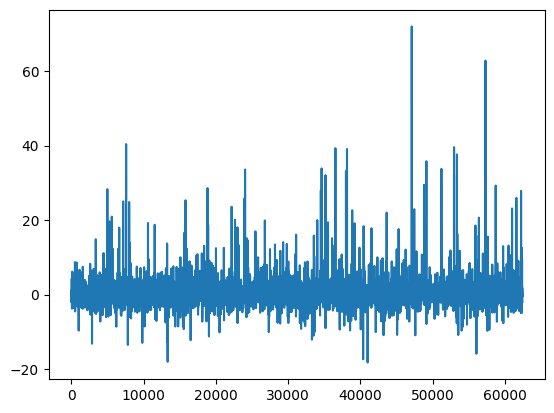

In [829]:
plt.plot(range(len(results_output)), [results_output[i][0] - results_target[i] for i in range(len(results_output))])

In [830]:
results_output

[[-0.007577180862426758],
 [-0.004443530924618244],
 [-0.003267236053943634],
 [-0.008222877979278564],
 [-0.010116100311279297],
 [-0.0029480941593647003],
 [-0.008854720741510391],
 [-0.007774785161018372],
 [-0.0073785074055194855],
 [-0.0070454031229019165],
 [-0.007904063910245895],
 [-0.0047002267092466354],
 [-0.004925943911075592],
 [-0.005136808380484581],
 [-0.0077967047691345215],
 [-0.006130039691925049],
 [0.004276573657989502],
 [-0.008122041821479797],
 [-0.009683873504400253],
 [-0.0062600672245025635],
 [-0.005921907722949982],
 [-0.007384192198514938],
 [-0.006122514605522156],
 [-0.00887596607208252],
 [-0.009249657392501831],
 [-0.006044149398803711],
 [-0.007421344518661499],
 [-0.007948450744152069],
 [-0.0067140087485313416],
 [-0.008297562599182129],
 [-0.010330267250537872],
 [-0.005754910409450531],
 [-0.009250134229660034],
 [-0.00902051292359829],
 [-0.008914336562156677],
 [-0.005817502737045288],
 [-0.007087007164955139],
 [-0.007923443801701069],
 [-0.007